## TP 03 : Détection d'objets

Le but de ce TP est d'évaluer un détecteur de type YOLO pour une tâche de détection de voiture

Télécharger la base de données [Car Object Detection](https://www.kaggle.com/datasets/sshikamaru/car-object-detection)

#### Décompression d'une archive .zip depuis un Notebook

Si vous utilisez un Notebook sur un serveur (p. ex. Google Colab), il est plus efficace de télécharger directement l'archive .zip sur le serveur plutôt que de télécharger toutes les données décompressées.
Pour décompresser une archive depuis le serveur, la commande ci-dessous peut être utilisée dans un Notebook:

In [ ]:
!unzip archive.zip

#### Installation de YOLO

Installer la bibliothèque [ultralytics](https://docs.ultralytics.com/fr) contenant les modèles YOLO:

In [ ]:
%pip install ultralytics

#### Inférence d'un modèle YOLO

La commande ci-dessous permet de charger un modèle YOLO pré-entrainé (sur la base de données [COCO](https://cocodataset.org/#home)):

In [2]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

Pour lancer l'inférence sur une image, utiliser la commande ci-dessous:

In [3]:
results = model("data/training_images/vid_4_1000.jpg")


image 1/1 d:\git\ro13\tp\data\training_images\vid_4_1000.jpg: 384x640 1 car, 60.1ms
Speed: 2.0ms preprocess, 60.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Le nombre `11` indique qu'on utilise la version 11 de YOLO.
La lettre `n` indique qu'il s'agit du plus petit modèle (nano), la lettre `n` peut être remplacée par des plus grands modèles `s`, `m`, `l` et `x`.

Par défaut, il s'agit d'un modèle pour la détection d'objets.
Un suffixe `-seg`, `-pose`, `-obb`, `-cls` peut être ajouté pour traiter les problèmes de segmentation d'instances, de calcul de pose, de détection orientée d'objets et de classification d'images.

#### Visualisation des résultats

Le code ci-dessous permet de visualiser les résultats issues de la détection.

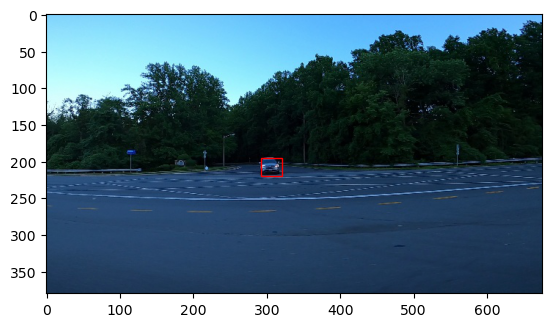

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

I = plt.imread("data/training_images/vid_4_1000.jpg")

fig, ax = plt.subplots()
ax.imshow(I)

for res in results:
  for bb in res.boxes.xywh:
    x, y, w, h = bb
    rect = patches.Rectangle((x-w/2, y-h/2), w, h,
                             linewidth=1, edgecolor='r',
                             facecolor='none')
    ax.add_patch(rect)

plt.show()

#### Exercices

Pour l'ensemble des questions ci-dessous, on pourra commencer avec un sous-ensemble des données d'apprentissage.
1. Calculer les détections sur l'ensemble des images du dossier `training_images`.
2. Caractériser les détections en True Positive (TP), False Positive (FP) et False Negative (FN) en comparant les détections avec les annotations contenues dans le fichier `train_solution_bounding_boxes (1).csv`.
3. Tracer la courbe précision/rappel du détecteur.
4. Comparer les performances de différents modèles de YOLO.